Import required libraries: 

In [12]:
import os
import sys
sys.path.insert(0, os.path.join(os.getcwd(), ".."))

import numpy as np
import matplotlib.pyplot as plt 

from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
rcParams['figure.dpi'] = 300

import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import our own libraries: 

In [2]:
from project.training.train import train as train

In [6]:
# train the model 
train()

Loading the datasets...
- done.
Starting training for 100 epoch(s)
Epoch 1/100
100%|██████████| 32/32 [00:00<00:00, 55.84it/s, loss=1.872]
- Train metrics: accuracy: 0.469 ; loss: 2.563
- Eval metrics : accuracy: 0.539 ; loss: 1.605
- Found new best accuracy
Epoch 2/100
 28%|██▊       | 9/32 [00:00<00:00, 57.25it/s, loss=1.640]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.32it/s, loss=1.592]
- Train metrics: accuracy: 0.500 ; loss: 1.619
- Eval metrics : accuracy: 0.641 ; loss: 1.513
- Found new best accuracy
Epoch 3/100
 28%|██▊       | 9/32 [00:00<00:00, 59.04it/s, loss=1.498]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.57it/s, loss=1.454]
- Train metrics: accuracy: 0.688 ; loss: 1.480
- Eval metrics : accuracy: 0.531 ; loss: 1.351
Epoch 4/100
 28%|██▊       | 9/32 [00:00<00:00, 56.33it/s, loss=1.373]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 61.11it/s, loss=1.320]
- Train metrics: accuracy: 0.531 ; loss: 1.350
- Eval metrics : accuracy: 0.586 ; loss: 1.195
Epoch 5/100
 31%|███▏      | 10/32 [00:00<00:00, 57.92it/s, loss=1.270]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.05it/s, loss=1.272]
- Train metrics: accuracy: 0.500 ; loss: 1.444
- Eval metrics : accuracy: 0.617 ; loss: 1.228
Epoch 6/100
 31%|███▏      | 10/32 [00:00<00:00, 58.97it/s, loss=1.217]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.32it/s, loss=1.180]
- Train metrics: accuracy: 0.469 ; loss: 1.341
- Eval metrics : accuracy: 0.555 ; loss: 1.147
Epoch 7/100
 31%|███▏      | 10/32 [00:00<00:00, 59.58it/s, loss=1.102]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.21it/s, loss=1.168]
- Train metrics: accuracy: 0.406 ; loss: 1.169
- Eval metrics : accuracy: 0.453 ; loss: 1.522
Epoch 8/100
 31%|███▏      | 10/32 [00:00<00:00, 62.00it/s, loss=1.370]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 63.39it/s, loss=1.200]
- Train metrics: accuracy: 0.500 ; loss: 2.237
- Eval metrics : accuracy: 0.508 ; loss: 1.050
Epoch 9/100
 31%|███▏      | 10/32 [00:00<00:00, 60.56it/s, loss=1.044]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 61.84it/s, loss=1.021]
- Train metrics: accuracy: 0.406 ; loss: 1.037
- Eval metrics : accuracy: 0.500 ; loss: 1.018
Epoch 10/100
 28%|██▊       | 9/32 [00:00<00:00, 55.24it/s, loss=0.936]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 61.20it/s, loss=0.948]
- Train metrics: accuracy: 0.625 ; loss: 0.998
- Eval metrics : accuracy: 0.562 ; loss: 0.819
Epoch 11/100
 31%|███▏      | 10/32 [00:00<00:00, 58.78it/s, loss=0.933]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 61.59it/s, loss=0.906]
- Train metrics: accuracy: 0.406 ; loss: 0.889
- Eval metrics : accuracy: 0.539 ; loss: 0.878
Epoch 12/100
 31%|███▏      | 10/32 [00:00<00:00, 60.80it/s, loss=0.890]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.54it/s, loss=0.911]
- Train metrics: accuracy: 0.438 ; loss: 0.839
- Eval metrics : accuracy: 0.492 ; loss: 0.838
Epoch 13/100
 31%|███▏      | 10/32 [00:00<00:00, 61.12it/s, loss=0.973]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 63.41it/s, loss=0.997]
- Train metrics: accuracy: 0.500 ; loss: 0.707
- Eval metrics : accuracy: 0.484 ; loss: 0.977
Epoch 14/100
 31%|███▏      | 10/32 [00:00<00:00, 59.77it/s, loss=0.965]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.63it/s, loss=0.949]
- Train metrics: accuracy: 0.625 ; loss: 0.869
- Eval metrics : accuracy: 0.445 ; loss: 0.705
Epoch 15/100
 28%|██▊       | 9/32 [00:00<00:00, 55.84it/s, loss=0.863]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.48it/s, loss=0.859]
- Train metrics: accuracy: 0.531 ; loss: 0.751
- Eval metrics : accuracy: 0.484 ; loss: 0.836
Epoch 16/100
 31%|███▏      | 10/32 [00:00<00:00, 61.28it/s, loss=0.853]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 63.47it/s, loss=0.851]
- Train metrics: accuracy: 0.312 ; loss: 0.866
- Eval metrics : accuracy: 0.445 ; loss: 0.777
Epoch 17/100
 31%|███▏      | 10/32 [00:00<00:00, 61.56it/s, loss=0.819]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.85it/s, loss=0.830]
- Train metrics: accuracy: 0.500 ; loss: 0.621
- Eval metrics : accuracy: 0.539 ; loss: 0.932
Epoch 18/100
 28%|██▊       | 9/32 [00:00<00:00, 56.50it/s, loss=0.945]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.63it/s, loss=0.898]
- Train metrics: accuracy: 0.500 ; loss: 0.959
- Eval metrics : accuracy: 0.539 ; loss: 0.675
Epoch 19/100
 31%|███▏      | 10/32 [00:00<00:00, 61.60it/s, loss=0.793]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.37it/s, loss=0.802]
- Train metrics: accuracy: 0.562 ; loss: 0.916
- Eval metrics : accuracy: 0.484 ; loss: 0.696
Epoch 20/100
 31%|███▏      | 10/32 [00:00<00:00, 58.24it/s, loss=0.801]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.02it/s, loss=0.762]
- Train metrics: accuracy: 0.562 ; loss: 0.725
- Eval metrics : accuracy: 0.570 ; loss: 0.777
Epoch 21/100
 31%|███▏      | 10/32 [00:00<00:00, 59.77it/s, loss=0.742]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.22it/s, loss=0.731]
- Train metrics: accuracy: 0.625 ; loss: 0.758
- Eval metrics : accuracy: 0.555 ; loss: 0.580
Epoch 22/100
 31%|███▏      | 10/32 [00:00<00:00, 60.65it/s, loss=0.686]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.50it/s, loss=0.740]
- Train metrics: accuracy: 0.656 ; loss: 0.669
- Eval metrics : accuracy: 0.375 ; loss: 0.880
Epoch 23/100
 31%|███▏      | 10/32 [00:00<00:00, 61.53it/s, loss=0.745]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 63.12it/s, loss=0.751]
- Train metrics: accuracy: 0.500 ; loss: 0.787
- Eval metrics : accuracy: 0.438 ; loss: 0.698
Epoch 24/100
 31%|███▏      | 10/32 [00:00<00:00, 61.94it/s, loss=0.873]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.96it/s, loss=1.021]
- Train metrics: accuracy: 0.719 ; loss: 0.579
- Eval metrics : accuracy: 0.609 ; loss: 0.915
Epoch 25/100
 31%|███▏      | 10/32 [00:00<00:00, 62.86it/s, loss=0.748]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 62.78it/s, loss=0.779]
- Train metrics: accuracy: 0.500 ; loss: 0.759
- Eval metrics : accuracy: 0.547 ; loss: 0.774
Epoch 26/100
 28%|██▊       | 9/32 [00:00<00:00, 59.22it/s, loss=0.758]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.14it/s, loss=0.726]
- Train metrics: accuracy: 0.594 ; loss: 0.725
- Eval metrics : accuracy: 0.461 ; loss: 0.634
Epoch 27/100
 31%|███▏      | 10/32 [00:00<00:00, 58.21it/s, loss=0.799]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 61.05it/s, loss=0.708]
- Train metrics: accuracy: 0.562 ; loss: 0.783
- Eval metrics : accuracy: 0.508 ; loss: 0.627
Epoch 28/100
 28%|██▊       | 9/32 [00:00<00:00, 58.13it/s, loss=0.700]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.76it/s, loss=0.721]
- Train metrics: accuracy: 0.531 ; loss: 0.776
- Eval metrics : accuracy: 0.461 ; loss: 0.817
Epoch 29/100
 28%|██▊       | 9/32 [00:00<00:00, 57.76it/s, loss=0.930]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.38it/s, loss=0.863]
- Train metrics: accuracy: 0.531 ; loss: 1.514
- Eval metrics : accuracy: 0.516 ; loss: 0.864
Epoch 30/100
 31%|███▏      | 10/32 [00:00<00:00, 58.74it/s, loss=0.742]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.68it/s, loss=0.737]
- Train metrics: accuracy: 0.625 ; loss: 0.785
- Eval metrics : accuracy: 0.406 ; loss: 0.681
Epoch 31/100
 28%|██▊       | 9/32 [00:00<00:00, 54.42it/s, loss=0.708]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.14it/s, loss=0.708]
- Train metrics: accuracy: 0.406 ; loss: 0.721
- Eval metrics : accuracy: 0.539 ; loss: 0.814
Epoch 32/100
 28%|██▊       | 9/32 [00:00<00:00, 57.15it/s, loss=0.621]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.42it/s, loss=0.701]
- Train metrics: accuracy: 0.500 ; loss: 0.490
- Eval metrics : accuracy: 0.430 ; loss: 0.681
Epoch 33/100
 28%|██▊       | 9/32 [00:00<00:00, 57.30it/s, loss=0.727]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.94it/s, loss=0.788]
- Train metrics: accuracy: 0.406 ; loss: 0.553
- Eval metrics : accuracy: 0.461 ; loss: 0.667
Epoch 34/100
 28%|██▊       | 9/32 [00:00<00:00, 55.94it/s, loss=0.681]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.04it/s, loss=0.670]
- Train metrics: accuracy: 0.531 ; loss: 0.819
- Eval metrics : accuracy: 0.430 ; loss: 0.710
Epoch 35/100
 31%|███▏      | 10/32 [00:00<00:00, 59.34it/s, loss=0.719]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.96it/s, loss=0.650]
- Train metrics: accuracy: 0.750 ; loss: 0.720
- Eval metrics : accuracy: 0.609 ; loss: 0.631
Epoch 36/100
 31%|███▏      | 10/32 [00:00<00:00, 58.52it/s, loss=0.639]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 61.48it/s, loss=0.672]
- Train metrics: accuracy: 0.438 ; loss: 0.465
- Eval metrics : accuracy: 0.492 ; loss: 0.669
Epoch 37/100
 28%|██▊       | 9/32 [00:00<00:00, 55.96it/s, loss=0.671]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.24it/s, loss=0.685]
- Train metrics: accuracy: 0.594 ; loss: 0.676
- Eval metrics : accuracy: 0.492 ; loss: 0.723
Epoch 38/100
 31%|███▏      | 10/32 [00:00<00:00, 59.55it/s, loss=0.735]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 54.61it/s, loss=0.636]
- Train metrics: accuracy: 0.469 ; loss: 0.711
- Eval metrics : accuracy: 0.453 ; loss: 0.648
Epoch 39/100
 28%|██▊       | 9/32 [00:00<00:00, 58.07it/s, loss=0.659]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.11it/s, loss=0.676]
- Train metrics: accuracy: 0.469 ; loss: 0.699
- Eval metrics : accuracy: 0.438 ; loss: 0.604
Epoch 40/100
 28%|██▊       | 9/32 [00:00<00:00, 56.62it/s, loss=0.708]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.73it/s, loss=0.657]
- Train metrics: accuracy: 0.562 ; loss: 0.654
- Eval metrics : accuracy: 0.531 ; loss: 0.549
Epoch 41/100
 31%|███▏      | 10/32 [00:00<00:00, 58.53it/s, loss=0.618]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.50it/s, loss=0.619]
- Train metrics: accuracy: 0.500 ; loss: 0.583
- Eval metrics : accuracy: 0.383 ; loss: 1.007
Epoch 42/100
 31%|███▏      | 10/32 [00:00<00:00, 59.90it/s, loss=0.721]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 61.00it/s, loss=0.674]
- Train metrics: accuracy: 0.750 ; loss: 1.362
- Eval metrics : accuracy: 0.594 ; loss: 0.685
Epoch 43/100
 31%|███▏      | 10/32 [00:00<00:00, 58.65it/s, loss=0.695]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.72it/s, loss=0.620]
- Train metrics: accuracy: 0.625 ; loss: 0.579
- Eval metrics : accuracy: 0.508 ; loss: 0.602
Epoch 44/100
 31%|███▏      | 10/32 [00:00<00:00, 58.21it/s, loss=0.591]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.44it/s, loss=0.594]
- Train metrics: accuracy: 0.469 ; loss: 0.581
- Eval metrics : accuracy: 0.453 ; loss: 0.515
Epoch 45/100
 28%|██▊       | 9/32 [00:00<00:00, 54.39it/s, loss=0.667]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.89it/s, loss=0.656]
- Train metrics: accuracy: 0.375 ; loss: 0.750
- Eval metrics : accuracy: 0.547 ; loss: 0.667
Epoch 46/100
 28%|██▊       | 9/32 [00:00<00:00, 57.82it/s, loss=0.720]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.57it/s, loss=0.721]
- Train metrics: accuracy: 0.438 ; loss: 0.626
- Eval metrics : accuracy: 0.500 ; loss: 0.519
Epoch 47/100
 28%|██▊       | 9/32 [00:00<00:00, 56.40it/s, loss=0.606]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.98it/s, loss=0.607]
- Train metrics: accuracy: 0.562 ; loss: 0.492
- Eval metrics : accuracy: 0.555 ; loss: 0.624
Epoch 48/100
 28%|██▊       | 9/32 [00:00<00:00, 57.51it/s, loss=0.652]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.53it/s, loss=0.630]
- Train metrics: accuracy: 0.562 ; loss: 0.643
- Eval metrics : accuracy: 0.484 ; loss: 0.613
Epoch 49/100
 28%|██▊       | 9/32 [00:00<00:00, 59.02it/s, loss=0.632]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.47it/s, loss=0.593]
- Train metrics: accuracy: 0.469 ; loss: 0.484
- Eval metrics : accuracy: 0.461 ; loss: 0.591
Epoch 50/100
 28%|██▊       | 9/32 [00:00<00:00, 56.54it/s, loss=0.587]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.89it/s, loss=0.584]
- Train metrics: accuracy: 0.562 ; loss: 0.472
- Eval metrics : accuracy: 0.523 ; loss: 0.577
Epoch 51/100
 25%|██▌       | 8/32 [00:00<00:00, 51.04it/s, loss=0.628]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.15it/s, loss=0.633]
- Train metrics: accuracy: 0.438 ; loss: 0.543
- Eval metrics : accuracy: 0.508 ; loss: 0.506
Epoch 52/100
 25%|██▌       | 8/32 [00:00<00:00, 57.58it/s, loss=0.573]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 51.67it/s, loss=0.569]
- Train metrics: accuracy: 0.406 ; loss: 0.451
- Eval metrics : accuracy: 0.562 ; loss: 0.550
Epoch 53/100
 25%|██▌       | 8/32 [00:00<00:00, 51.60it/s, loss=0.521]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 53.01it/s, loss=0.574]
- Train metrics: accuracy: 0.406 ; loss: 0.697
- Eval metrics : accuracy: 0.555 ; loss: 0.562
Epoch 54/100
 22%|██▏       | 7/32 [00:00<00:00, 48.51it/s, loss=0.534]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 47.95it/s, loss=0.586]
- Train metrics: accuracy: 0.469 ; loss: 0.270
- Eval metrics : accuracy: 0.562 ; loss: 0.589
Epoch 55/100
 25%|██▌       | 8/32 [00:00<00:00, 54.98it/s, loss=0.541]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 56.48it/s, loss=0.531]
- Train metrics: accuracy: 0.406 ; loss: 0.706
- Eval metrics : accuracy: 0.562 ; loss: 0.442
Epoch 56/100
 28%|██▊       | 9/32 [00:00<00:00, 56.60it/s, loss=0.480]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.99it/s, loss=0.551]
- Train metrics: accuracy: 0.594 ; loss: 0.586
- Eval metrics : accuracy: 0.430 ; loss: 0.605
Epoch 57/100
 28%|██▊       | 9/32 [00:00<00:00, 56.55it/s, loss=0.525]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 55.57it/s, loss=0.558]
- Train metrics: accuracy: 0.438 ; loss: 0.543
- Eval metrics : accuracy: 0.477 ; loss: 0.446
Epoch 58/100
 28%|██▊       | 9/32 [00:00<00:00, 56.42it/s, loss=0.611]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.70it/s, loss=0.529]
- Train metrics: accuracy: 0.500 ; loss: 0.629
- Eval metrics : accuracy: 0.562 ; loss: 0.477
Epoch 59/100
 31%|███▏      | 10/32 [00:00<00:00, 59.16it/s, loss=0.527]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.86it/s, loss=0.500]
- Train metrics: accuracy: 0.469 ; loss: 0.442
- Eval metrics : accuracy: 0.500 ; loss: 0.395
Epoch 60/100
 28%|██▊       | 9/32 [00:00<00:00, 58.84it/s, loss=0.528]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.82it/s, loss=0.549]
- Train metrics: accuracy: 0.469 ; loss: 0.672
- Eval metrics : accuracy: 0.484 ; loss: 0.453
Epoch 61/100
 31%|███▏      | 10/32 [00:00<00:00, 57.81it/s, loss=0.510]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.29it/s, loss=0.520]
- Train metrics: accuracy: 0.469 ; loss: 0.432
- Eval metrics : accuracy: 0.578 ; loss: 0.362
Epoch 62/100
 31%|███▏      | 10/32 [00:00<00:00, 59.60it/s, loss=0.574]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.68it/s, loss=0.541]
- Train metrics: accuracy: 0.531 ; loss: 0.546
- Eval metrics : accuracy: 0.500 ; loss: 0.586
Epoch 63/100
 28%|██▊       | 9/32 [00:00<00:00, 58.69it/s, loss=0.525]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.86it/s, loss=0.539]
- Train metrics: accuracy: 0.531 ; loss: 0.296
- Eval metrics : accuracy: 0.562 ; loss: 0.677
Epoch 64/100
 31%|███▏      | 10/32 [00:00<00:00, 56.43it/s, loss=0.531]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.08it/s, loss=0.537]
- Train metrics: accuracy: 0.406 ; loss: 0.793
- Eval metrics : accuracy: 0.508 ; loss: 0.500
Epoch 65/100
 28%|██▊       | 9/32 [00:00<00:00, 55.18it/s, loss=0.485]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.41it/s, loss=0.532]
- Train metrics: accuracy: 0.594 ; loss: 0.374
- Eval metrics : accuracy: 0.617 ; loss: 0.560
Epoch 66/100
 31%|███▏      | 10/32 [00:00<00:00, 59.85it/s, loss=0.498]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.97it/s, loss=0.503]
- Train metrics: accuracy: 0.438 ; loss: 0.552
- Eval metrics : accuracy: 0.570 ; loss: 0.471
Epoch 67/100
 28%|██▊       | 9/32 [00:00<00:00, 48.96it/s, loss=0.519]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.57it/s, loss=0.528]
- Train metrics: accuracy: 0.500 ; loss: 0.503
- Eval metrics : accuracy: 0.562 ; loss: 0.509
Epoch 68/100
 28%|██▊       | 9/32 [00:00<00:00, 55.01it/s, loss=0.544]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.82it/s, loss=0.537]
- Train metrics: accuracy: 0.562 ; loss: 0.569
- Eval metrics : accuracy: 0.445 ; loss: 0.527
Epoch 69/100
 28%|██▊       | 9/32 [00:00<00:00, 56.81it/s, loss=0.494]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.58it/s, loss=0.501]
- Train metrics: accuracy: 0.531 ; loss: 0.867
- Eval metrics : accuracy: 0.594 ; loss: 0.467
Epoch 70/100
 28%|██▊       | 9/32 [00:00<00:00, 56.45it/s, loss=0.510]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.86it/s, loss=0.469]
- Train metrics: accuracy: 0.625 ; loss: 0.764
- Eval metrics : accuracy: 0.461 ; loss: 0.676
Epoch 71/100
 28%|██▊       | 9/32 [00:00<00:00, 55.50it/s, loss=0.416]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.25it/s, loss=0.501]
- Train metrics: accuracy: 0.500 ; loss: 0.428
- Eval metrics : accuracy: 0.523 ; loss: 0.397
Epoch 72/100
 31%|███▏      | 10/32 [00:00<00:00, 58.18it/s, loss=0.527]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.91it/s, loss=0.498]
- Train metrics: accuracy: 0.375 ; loss: 0.435
- Eval metrics : accuracy: 0.422 ; loss: 0.461
Epoch 73/100
 31%|███▏      | 10/32 [00:00<00:00, 59.89it/s, loss=0.467]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.73it/s, loss=0.498]
- Train metrics: accuracy: 0.500 ; loss: 0.520
- Eval metrics : accuracy: 0.445 ; loss: 0.476
Epoch 74/100
 31%|███▏      | 10/32 [00:00<00:00, 59.39it/s, loss=0.482]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.74it/s, loss=0.491]
- Train metrics: accuracy: 0.562 ; loss: 0.498
- Eval metrics : accuracy: 0.461 ; loss: 0.652
Epoch 75/100
 31%|███▏      | 10/32 [00:00<00:00, 58.15it/s, loss=0.570]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.36it/s, loss=0.498]
- Train metrics: accuracy: 0.531 ; loss: 0.527
- Eval metrics : accuracy: 0.570 ; loss: 0.644
Epoch 76/100
 28%|██▊       | 9/32 [00:00<00:00, 58.87it/s, loss=0.525]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.63it/s, loss=0.526]
- Train metrics: accuracy: 0.469 ; loss: 0.293
- Eval metrics : accuracy: 0.383 ; loss: 0.612
Epoch 77/100
 28%|██▊       | 9/32 [00:00<00:00, 57.09it/s, loss=0.498]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.75it/s, loss=0.518]
- Train metrics: accuracy: 0.688 ; loss: 0.389
- Eval metrics : accuracy: 0.484 ; loss: 0.418
Epoch 78/100
 31%|███▏      | 10/32 [00:00<00:00, 56.93it/s, loss=0.456]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.07it/s, loss=0.473]
- Train metrics: accuracy: 0.500 ; loss: 0.448
- Eval metrics : accuracy: 0.422 ; loss: 0.485
Epoch 79/100
 25%|██▌       | 8/32 [00:00<00:00, 56.25it/s, loss=0.465]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 55.45it/s, loss=0.431]
- Train metrics: accuracy: 0.562 ; loss: 0.413
- Eval metrics : accuracy: 0.516 ; loss: 0.486
Epoch 80/100
 28%|██▊       | 9/32 [00:00<00:00, 57.41it/s, loss=0.412]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.88it/s, loss=0.488]
- Train metrics: accuracy: 0.594 ; loss: 0.355
- Eval metrics : accuracy: 0.484 ; loss: 0.596
Epoch 81/100
 28%|██▊       | 9/32 [00:00<00:00, 55.10it/s, loss=0.474]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 55.81it/s, loss=0.491]
- Train metrics: accuracy: 0.594 ; loss: 0.586
- Eval metrics : accuracy: 0.523 ; loss: 0.507
Epoch 82/100
 28%|██▊       | 9/32 [00:00<00:00, 56.71it/s, loss=0.505]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.77it/s, loss=0.484]
- Train metrics: accuracy: 0.625 ; loss: 0.563
- Eval metrics : accuracy: 0.594 ; loss: 0.327
Epoch 83/100
 25%|██▌       | 8/32 [00:00<00:00, 53.44it/s, loss=0.495]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 54.71it/s, loss=0.459]
- Train metrics: accuracy: 0.469 ; loss: 0.436
- Eval metrics : accuracy: 0.414 ; loss: 0.386
Epoch 84/100
 28%|██▊       | 9/32 [00:00<00:00, 54.27it/s, loss=0.387]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.19it/s, loss=0.468]
- Train metrics: accuracy: 0.531 ; loss: 0.262
- Eval metrics : accuracy: 0.500 ; loss: 0.574
Epoch 85/100
 28%|██▊       | 9/32 [00:00<00:00, 54.61it/s, loss=0.551]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.74it/s, loss=0.503]
- Train metrics: accuracy: 0.406 ; loss: 0.647
- Eval metrics : accuracy: 0.578 ; loss: 0.345
Epoch 86/100
 28%|██▊       | 9/32 [00:00<00:00, 57.71it/s, loss=0.474]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.35it/s, loss=0.474]
- Train metrics: accuracy: 0.656 ; loss: 0.458
- Eval metrics : accuracy: 0.523 ; loss: 0.326
Epoch 87/100
 28%|██▊       | 9/32 [00:00<00:00, 56.19it/s, loss=0.520]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.42it/s, loss=0.489]
- Train metrics: accuracy: 0.531 ; loss: 0.384
- Eval metrics : accuracy: 0.500 ; loss: 0.472
Epoch 88/100
 28%|██▊       | 9/32 [00:00<00:00, 56.81it/s, loss=0.456]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.58it/s, loss=0.437]
- Train metrics: accuracy: 0.562 ; loss: 0.283
- Eval metrics : accuracy: 0.469 ; loss: 0.454
Epoch 89/100
 28%|██▊       | 9/32 [00:00<00:00, 53.73it/s, loss=0.405]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.44it/s, loss=0.416]
- Train metrics: accuracy: 0.375 ; loss: 0.343
- Eval metrics : accuracy: 0.484 ; loss: 0.392
Epoch 90/100
 31%|███▏      | 10/32 [00:00<00:00, 58.30it/s, loss=0.405]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 56.93it/s, loss=0.449]
- Train metrics: accuracy: 0.594 ; loss: 0.363
- Eval metrics : accuracy: 0.469 ; loss: 0.385
Epoch 91/100
 28%|██▊       | 9/32 [00:00<00:00, 53.55it/s, loss=0.546]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 42.49it/s, loss=0.445]
- Train metrics: accuracy: 0.500 ; loss: 0.567
- Eval metrics : accuracy: 0.492 ; loss: 0.477
Epoch 92/100
 22%|██▏       | 7/32 [00:00<00:00, 43.72it/s, loss=0.484]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 52.29it/s, loss=0.428]
- Train metrics: accuracy: 0.281 ; loss: 0.483
- Eval metrics : accuracy: 0.555 ; loss: 0.582
Epoch 93/100
 28%|██▊       | 9/32 [00:00<00:00, 53.07it/s, loss=0.473]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 55.34it/s, loss=0.459]
- Train metrics: accuracy: 0.406 ; loss: 0.419
- Eval metrics : accuracy: 0.453 ; loss: 0.488
Epoch 94/100
 25%|██▌       | 8/32 [00:00<00:00, 52.42it/s, loss=0.443]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.00it/s, loss=0.458]
- Train metrics: accuracy: 0.406 ; loss: 0.429
- Eval metrics : accuracy: 0.539 ; loss: 0.364
Epoch 95/100
 28%|██▊       | 9/32 [00:00<00:00, 56.41it/s, loss=0.436]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.08it/s, loss=0.446]
- Train metrics: accuracy: 0.344 ; loss: 0.461
- Eval metrics : accuracy: 0.445 ; loss: 0.462
Epoch 96/100
 28%|██▊       | 9/32 [00:00<00:00, 57.63it/s, loss=0.462]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.98it/s, loss=0.426]
- Train metrics: accuracy: 0.562 ; loss: 0.261
- Eval metrics : accuracy: 0.492 ; loss: 0.344
Epoch 97/100
 28%|██▊       | 9/32 [00:00<00:00, 54.58it/s, loss=0.461]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 57.80it/s, loss=0.411]
- Train metrics: accuracy: 0.500 ; loss: 0.385
- Eval metrics : accuracy: 0.477 ; loss: 0.506
Epoch 98/100
 28%|██▊       | 9/32 [00:00<00:00, 56.15it/s, loss=0.418]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 60.52it/s, loss=0.442]
- Train metrics: accuracy: 0.469 ; loss: 0.494
- Eval metrics : accuracy: 0.508 ; loss: 0.457
Epoch 99/100
 28%|██▊       | 9/32 [00:00<00:00, 56.90it/s, loss=0.378]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 59.62it/s, loss=0.397]
- Train metrics: accuracy: 0.438 ; loss: 0.418
- Eval metrics : accuracy: 0.570 ; loss: 0.330
Epoch 100/100
 28%|██▊       | 9/32 [00:00<00:00, 57.88it/s, loss=0.314]

Checkpoint Directory exists! 


100%|██████████| 32/32 [00:00<00:00, 58.74it/s, loss=0.409]
- Train metrics: accuracy: 0.500 ; loss: 0.303
- Eval metrics : accuracy: 0.531 ; loss: 0.492


Checkpoint Directory exists! 


In [10]:
# retrieve saved model 
import project.networks.net as net
nets = lambda: nn.Sequential(nn.Linear(2, 256), nn.LeakyReLU(), nn.Linear(256, 256), nn.LeakyReLU(), nn.Linear(256, 2), nn.Tanh()) # net s
nett = lambda: nn.Sequential(nn.Linear(2, 256), nn.LeakyReLU(), nn.Linear(256, 256), nn.LeakyReLU(), nn.Linear(256, 2)) # net t
masks = torch.from_numpy(np.array([[0, 1], [1, 0]] * 3).astype(np.float32)) # 6x2 matrix. len(masks) = 6 = num subblocks.
prior = distributions.MultivariateNormal(torch.zeros(2), torch.eye(2))      # so we have a total of 3 neural blocks (see fig. 1 of boltzmann generators paper)
model = net.RealNVP(nets, nett, masks, prior)
model.load_state_dict(torch.load('results/training/testing.pt'))
#model.load_state_dict(torch.load('../project/experiments/base_model/best.pth.tar'))
#model.eval()

<All keys matched successfully>

Text(0.5, 1.0, '$X = g(z)$')

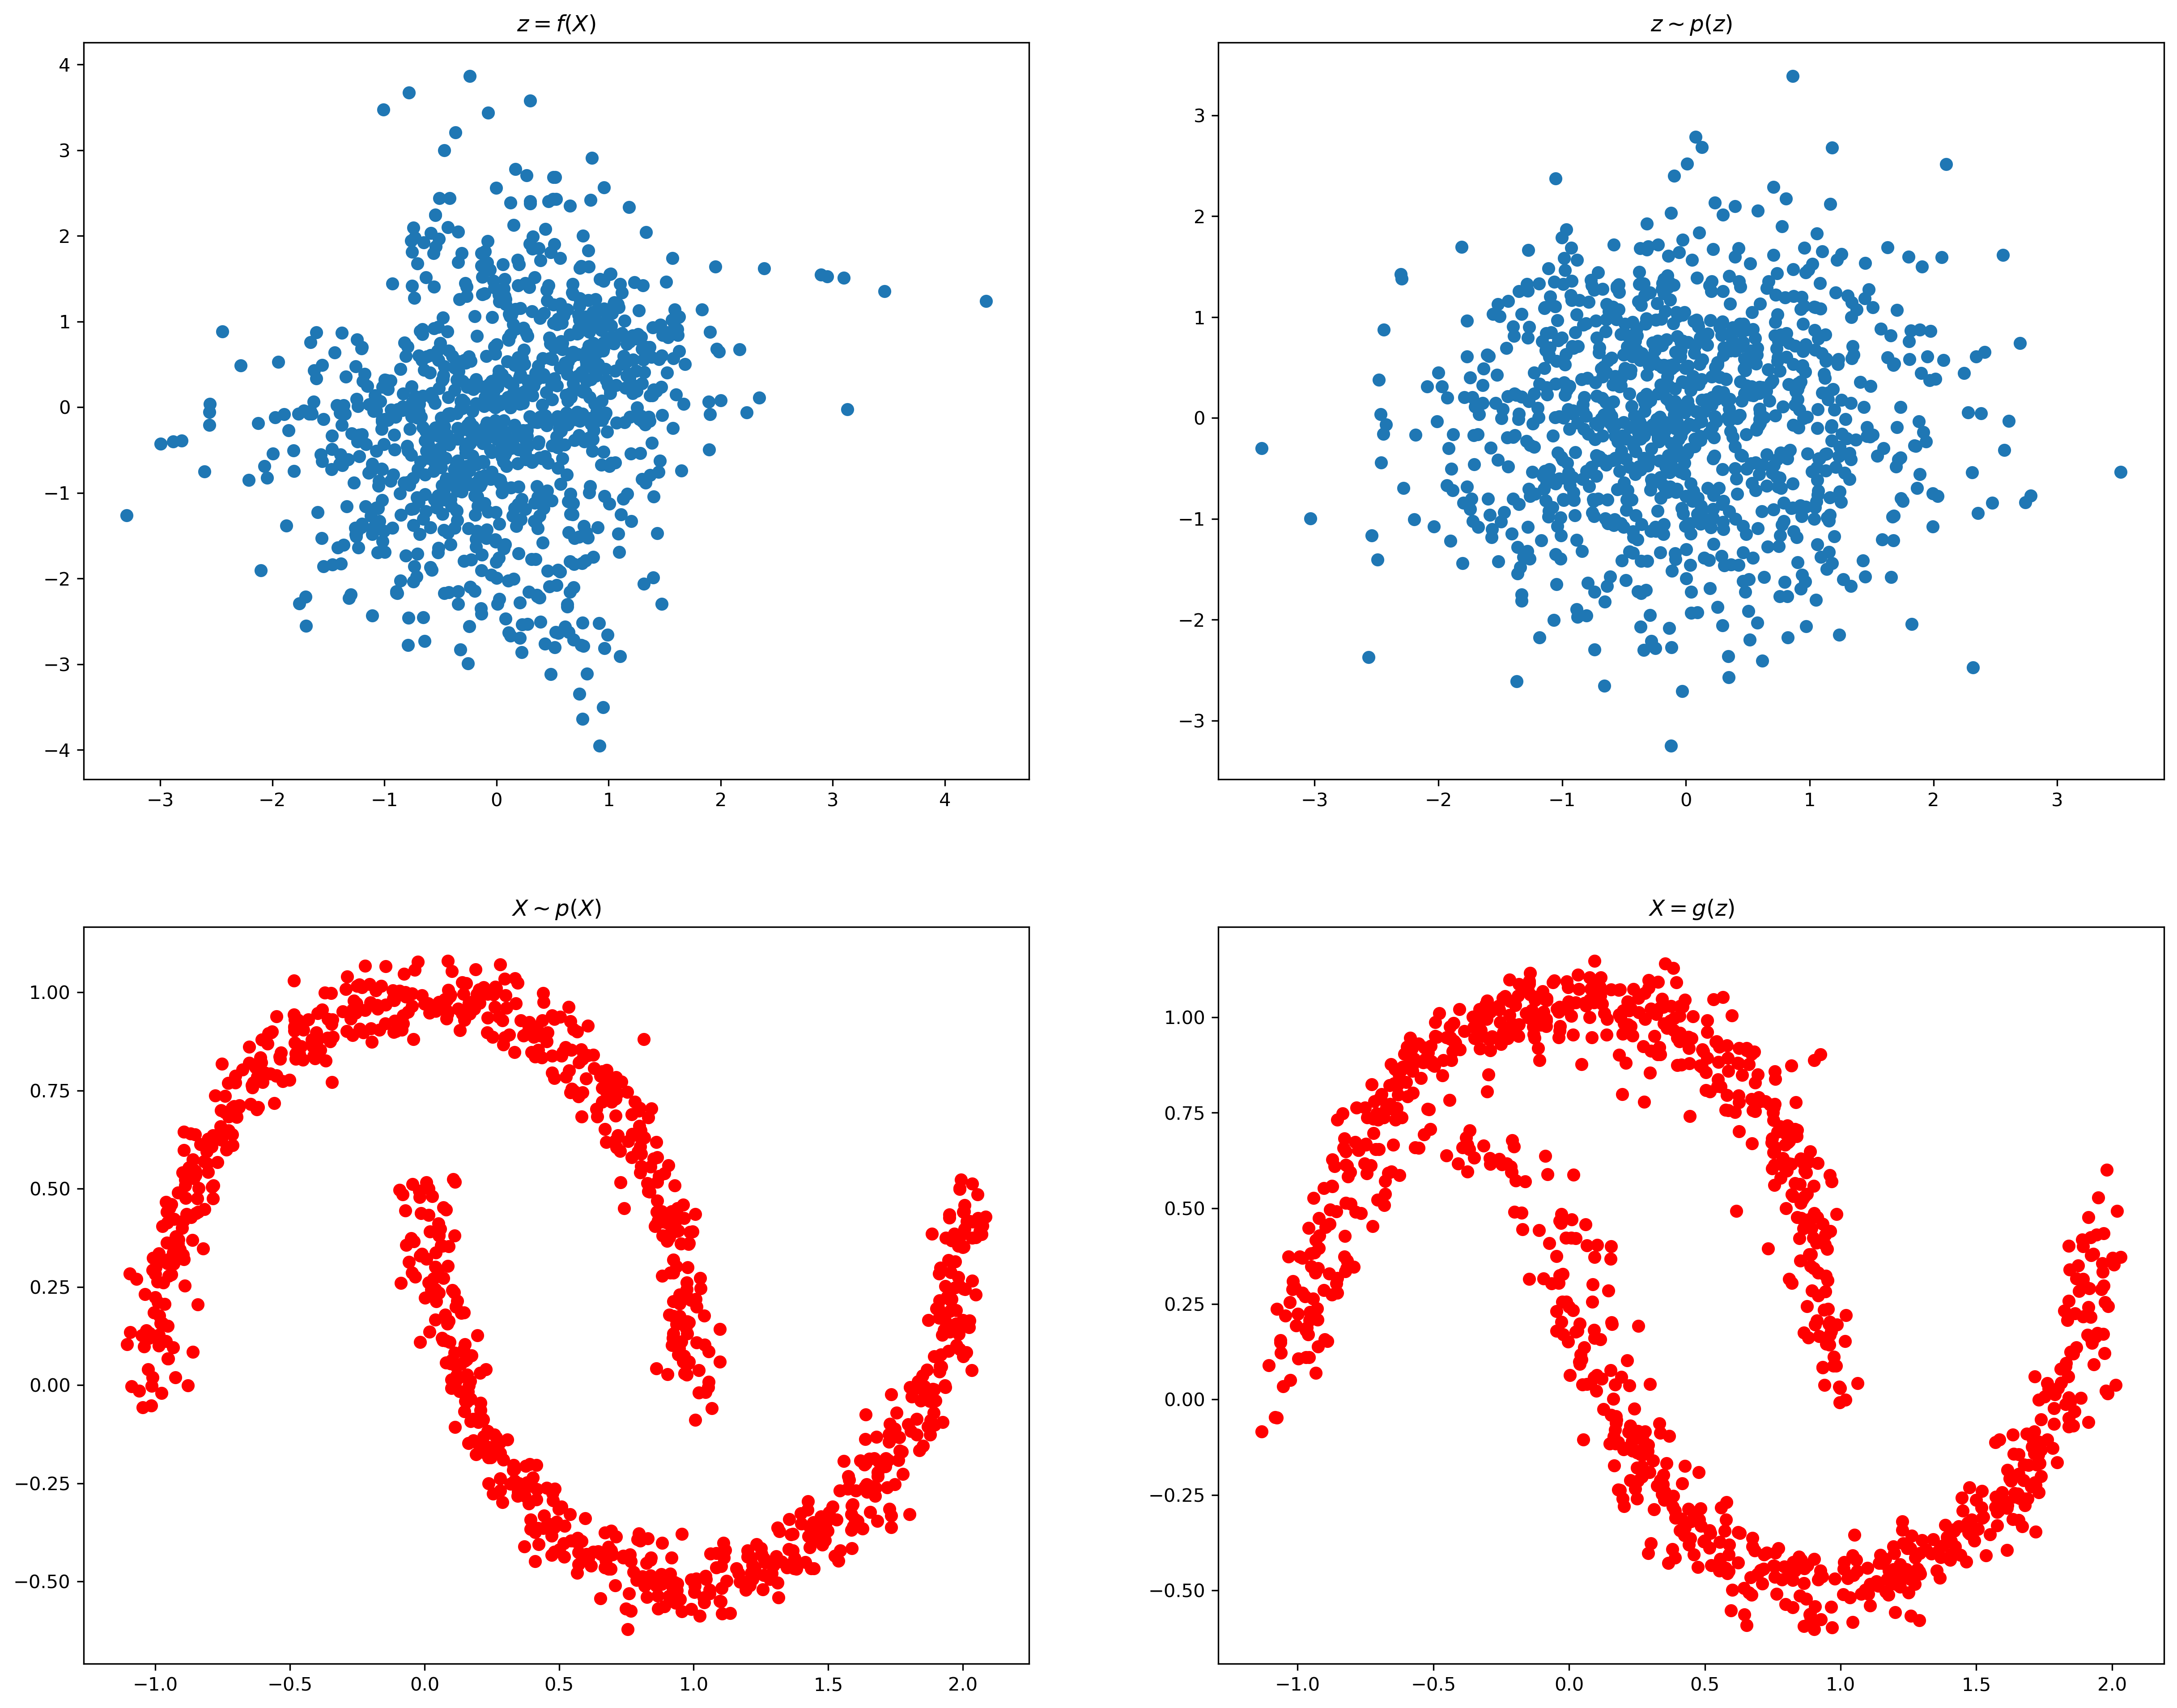

In [13]:
noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)[0].astype(np.float32)
z = model.f(torch.from_numpy(noisy_moons))[0].detach().numpy()
plt.subplot(221)
plt.scatter(z[:, 0], z[:, 1])
plt.title(r'$z = f(X)$')

z = np.random.multivariate_normal(np.zeros(2), np.eye(2), 1000)
plt.subplot(222)
plt.scatter(z[:, 0], z[:, 1])
plt.title(r'$z \sim p(z)$')

plt.subplot(223)
x = datasets.make_moons(n_samples=1000, noise=.05)[0].astype(np.float32)
plt.scatter(x[:, 0], x[:, 1], c='r')
plt.title(r'$X \sim p(X)$')

plt.subplot(224)
x = model.sample(1000).detach().numpy()
plt.scatter(x[:, 0, 0], x[:, 0, 1], c='r')
plt.title(r'$X = g(z)$')